Nuha BinTayyash, 2020

This notebook shows the ROC and precision-recall curves resulted from running GPcounts with one sample test on simulated bulk RNA-seq datasets.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
from scipy import stats

In [2]:
DESeq2 = pd.read_csv('alpha_DESeq2.csv',index_col=[0])
print(DESeq2.shape)
GPcounts_NB = pd.read_csv('ll_Negative_binomial_normalized_alpha_counts.csv',index_col=[0])
GPcounts_ZINB = pd.read_csv('ll_Zero_inflated_negative_binomial_normalized_alpha_counts.csv',index_col=[0])
GPcounts_G = pd.read_csv('ll_Gaussian_normalized_alpha_counts.csv',index_col=[0])
print(GPcounts_ZINB.shape)
print(GPcounts_NB.shape)
print(GPcounts_G.shape)

(18274, 6)
(18274, 3)
(18274, 3)
(18274, 3)


In [3]:
DESeq_sorted = DESeq2.sort_values(by=['padj'])
DESeq_sorted
nan_gene = list(DESeq_sorted[DESeq_sorted['padj'].isnull()].index.values)
DESeq_sorted = DESeq_sorted.drop(nan_gene)
DESeq_sorted

baseMean  log2FoldChange     lfcSE        stat  \
ENSMUSG00000000394  338406.987012        2.924096  0.092345  848.511483   
ENSMUSG00000023944    1336.307294       -1.948810  0.085680  574.353175   
ENSMUSG00000040856      21.171989      -11.540402  0.489058  424.702760   
ENSMUSG00000021270     380.144931       -2.526495  0.137592  376.412803   
ENSMUSG00000027419    4779.955765        1.505738  0.076123  356.010722   
...                           ...             ...       ...         ...   
ENSMUSG00000035851      54.009412        0.003102  0.278133    0.000120   
ENSMUSG00000023030      22.022264       -0.011229  0.617554    0.000350   
ENSMUSG00000097804       0.327192        0.188781  0.715850   -0.148915   
ENSMUSG00000064514       0.446073       -0.074894  1.176225   -0.025380   
ENSMUSG00000035133      90.032362        0.001008  0.343313    0.000009   

                           pvalue           padj  
ENSMUSG00000000394  1.531699e-186  2.419165e-182  
ENSMUSG00000023944  6.344396e-127  5.010170e-123  
ENSMUSG00000040856   2.311257e-94   1.216800e-90  
ENSMUSG00000021270   7.515536e-84   2.967509e-80  
ENSMUSG00000027419   2.080899e-79   6.573143e-76  
...                           ...            ...  
ENSMUSG00000035851   9.912563e-01   1.000000e+00  
ENSMUSG00000023030   9.850725e-01   1.000000e+00  
ENSMUSG00000097804   1.000000e+00   1.000000e+00  
ENSMUSG00000064514   1.000000e+00   1.000000e+00  
ENSMUSG00000035133   9.976590e-01   1.000000e+00  

[15794 rows x 6 columns]

In [4]:
GPcounts_ZINB_sorted = GPcounts_ZINB.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_ZINB_sorted
GPcounts_ZINB_sorted = GPcounts_ZINB.drop(nan_gene)
GPcounts_ZINB_sorted

Dynamic_model_log_likelihood  \
ENSMUSG00000000001                  -1818.689424   
ENSMUSG00000000028                   -298.604242   
ENSMUSG00000000031                   -127.762927   
ENSMUSG00000000037                   -150.274280   
ENSMUSG00000000049                    -45.005105   
...                                          ...   
ENSMUSG00000102059                   -634.982031   
ENSMUSG00000102070                  -2506.909534   
ENSMUSG00000102097                   -319.299978   
ENSMUSG00000102101                   -515.975272   
ENSMUSG00000102112                   -273.875257   

                    Constant_model_log_likelihood  log_likelihood_ratio  
ENSMUSG00000000001                   -1832.525235          1.383581e+01  
ENSMUSG00000000028                    -304.021035          5.416793e+00  
ENSMUSG00000000031                    -127.762926         -3.327245e-07  
ENSMUSG00000000037                    -161.090609          1.081633e+01  
ENSMUSG00000000049                     -46.868855          1.863750e+00  
...                                           ...                   ...  
ENSMUSG00000102059                    -646.929258          1.194723e+01  
ENSMUSG00000102070                   -2538.460434          3.155090e+01  
ENSMUSG00000102097                    -319.300028          4.982304e-05  
ENSMUSG00000102101                    -516.041257          6.598470e-02  
ENSMUSG00000102112                    -270.007932         -3.867326e+00  

[15794 rows x 3 columns]

In [5]:
GPcounts_NB_sorted = GPcounts_NB.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_NB_sorted = GPcounts_NB.drop(nan_gene)
GPcounts_NB_sorted

Dynamic_model_log_likelihood  \
ENSMUSG00000000001                  -1878.577664   
ENSMUSG00000000028                   -310.960670   
ENSMUSG00000000031                   -128.685892   
ENSMUSG00000000037                   -164.352203   
ENSMUSG00000000049                    -45.235383   
...                                          ...   
ENSMUSG00000102059                   -673.636913   
ENSMUSG00000102070                  -2509.870544   
ENSMUSG00000102097                   -328.207857   
ENSMUSG00000102101                   -571.691585   
ENSMUSG00000102112                   -282.103863   

                    Constant_model_log_likelihood  log_likelihood_ratio  
ENSMUSG00000000001                   -1886.731508              8.153844  
ENSMUSG00000000028                    -312.599931              1.639260  
ENSMUSG00000000031                    -128.685872             -0.000020  
ENSMUSG00000000037                    -164.352219              0.000016  
ENSMUSG00000000049                     -46.633722              1.398340  
...                                           ...                   ...  
ENSMUSG00000102059                    -675.407596              1.770683  
ENSMUSG00000102070                   -2536.524106             26.653562  
ENSMUSG00000102097                    -328.205368             -0.002489  
ENSMUSG00000102101                    -571.693341              0.001756  
ENSMUSG00000102112                    -282.103856             -0.000007  

[15794 rows x 3 columns]

In [6]:
GPcounts_G_sorted = GPcounts_G.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_G_sorted = GPcounts_G.drop(nan_gene)
GPcounts_G_sorted

Dynamic_model_log_likelihood  \
ENSMUSG00000000001                   -647.855596   
ENSMUSG00000000028                   -529.117237   
ENSMUSG00000000031                   -205.861402   
ENSMUSG00000000037                   -368.781351   
ENSMUSG00000000049                    312.746818   
...                                          ...   
ENSMUSG00000102059                   -600.634479   
ENSMUSG00000102070                    -56.501981   
ENSMUSG00000102097                   -482.233558   
ENSMUSG00000102101                   -536.141580   
ENSMUSG00000102112                   -407.068651   

                    Constant_model_log_likelihood  log_likelihood_ratio  
ENSMUSG00000000001                    -305.889541           -341.966054  
ENSMUSG00000000028                    -226.503419           -302.613818  
ENSMUSG00000000031                      20.294326           -226.155728  
ENSMUSG00000000037                    -104.007700           -264.773651  
ENSMUSG00000000049                     419.242477           -106.495659  
...                                           ...                   ...  
ENSMUSG00000102059                    -328.716614           -271.917865  
ENSMUSG00000102070                     615.728175           -672.230156  
ENSMUSG00000102097                    -212.673557           -269.560001  
ENSMUSG00000102101                    -292.395088           -243.746492  
ENSMUSG00000102112                    -170.065393           -237.003258  

[15794 rows x 3 columns]

In [7]:
DE_alpha = pd.read_csv('Sheet 2_Genes highly expressed in α-lineage.csv',index_col=[0])
DE_alpha.head()

Symbol                                        Description  \
ID                                                                             
ENSMUSG00000000394    Gcg                                           glucagon   
ENSMUSG00000001504   Irx2           Iroquois related homeobox 2 (Drosophila)   
ENSMUSG00000004631   Sgce                               sarcoglycan, epsilon   
ENSMUSG00000027524   Edn3                                       endothelin 3   
ENSMUSG00000027971  Ndst4  N-deacetylase/N-sulfotransferase (heparin gluc...   

                   Transcription Factor  log2FoldChange  Adjusted p-value  
ID                                                                         
ENSMUSG00000000394                    0      -11.282196               0.0  
ENSMUSG00000001504                    1       -9.326386               0.0  
ENSMUSG00000004631                    0       -9.841030               0.0  
ENSMUSG00000027524                  NaN       -9.563078               0.0  
ENSMUSG00000027971                  NaN       -7.362420               0.0

In [8]:
#DESeq_index = list(DESeq_sorted.index.values)
#best_DE_alpha_index = list(DE_alpha.index.values)
#GPcounts_NB_index = list(GPcounts_NB_sorted.index)
#DESeq_idxes = [idx for idx, val in enumerate(DESeq_index) if val in best_DE_alpha_index]
#GPcounts_idxes = [idx for idx, val in enumerate(GPcounts_NB_index) if val in best_DE_alpha_index]
#GPcounts_DESeq_index = [idx for idx, val in enumerate(DESeq_index) if val in GPcounts_NB_index]
#DE_alpha_idxes  = list(range(0,len(best_DE_alpha_index)))
#DESeq_idxes = list(range(0,len(DESeq_index)))
#GPcounts_idxes = []
#for i in DESeq_index:
#    GPcounts_idxes.append(GPcounts_NB_index.index(i))

0.1
ZINB -0.051329073231370384


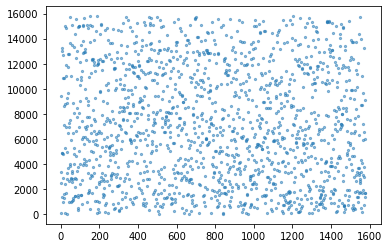

NB -0.051329073231370384


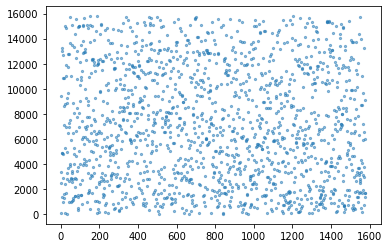

Gaussian -0.051329073231370384


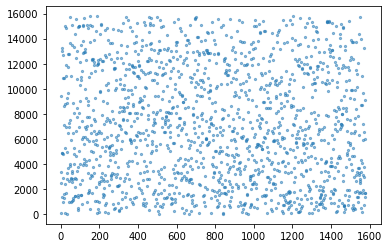

0.2
ZINB 0.013340745053211008


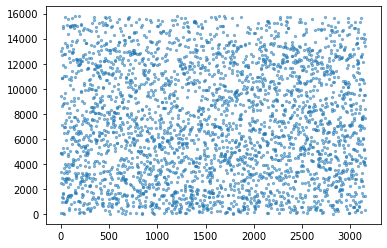

NB 0.013340745053211008


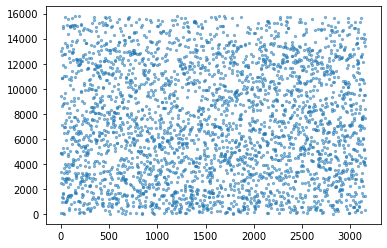

Gaussian 0.013340745053211008


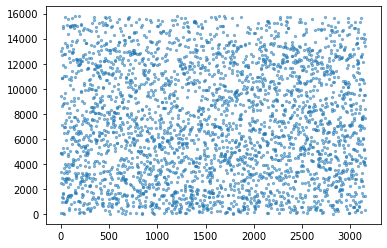

0.30000000000000004
ZINB 0.03015640147335484


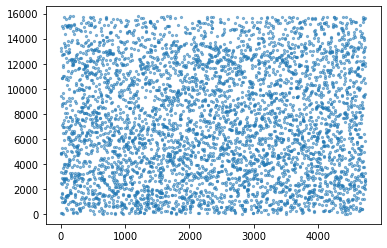

NB 0.03015640147335484


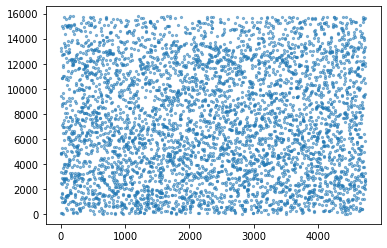

Gaussian 0.03015640147335484


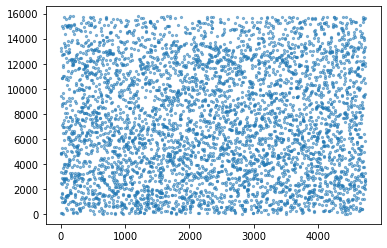

0.4
ZINB 0.05212796636149733


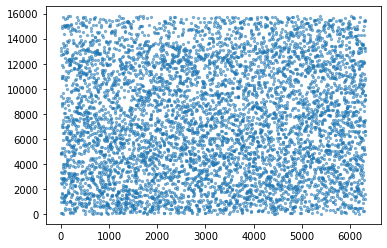

NB 0.05212796636149733


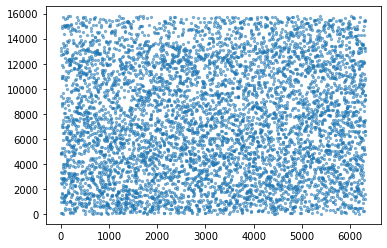

Gaussian 0.05212796636149733


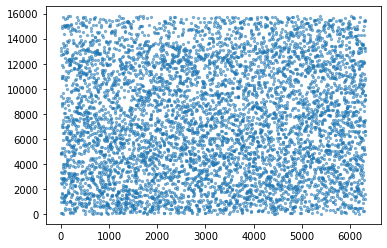

0.5
ZINB 0.06588817337422206


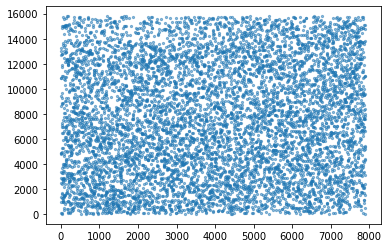

NB 0.06588817337422206


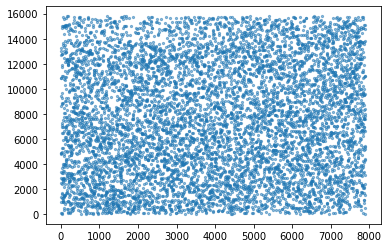

Gaussian 0.06588817337422206


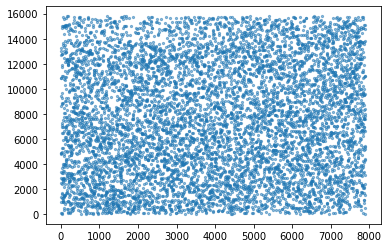

0.6000000000000001
ZINB 0.07181064296916359


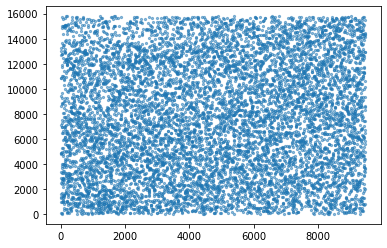

NB 0.07181064296916359


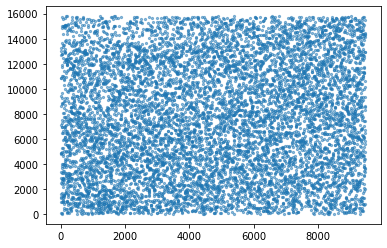

Gaussian 0.07181064296916359


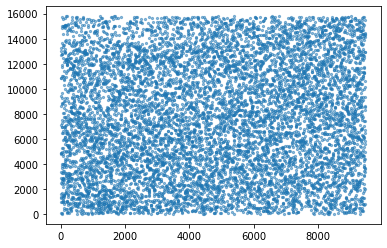

0.7000000000000001
ZINB 0.080211515453781


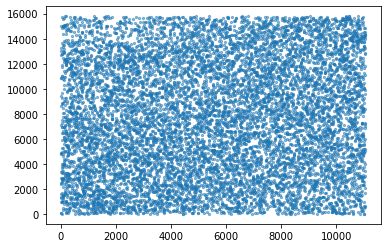

NB 0.080211515453781


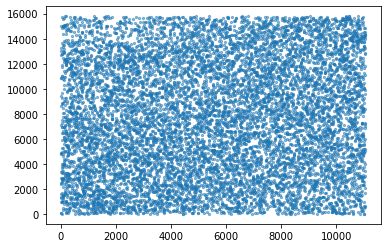

Gaussian 0.080211515453781


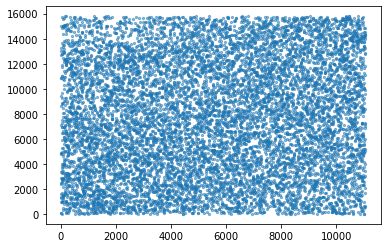

0.8
ZINB 0.088331866420569


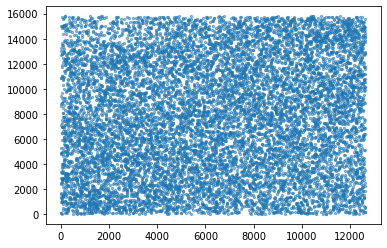

NB 0.088331866420569


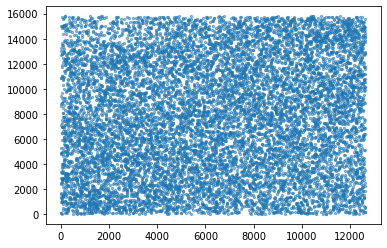

Gaussian 0.088331866420569


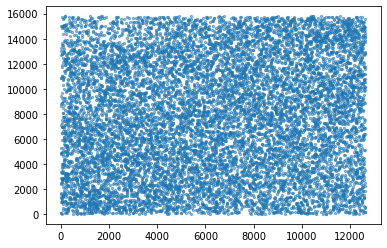

0.9
ZINB 0.09053569013392457


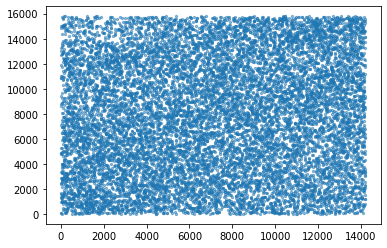

NB 0.09053569013392457


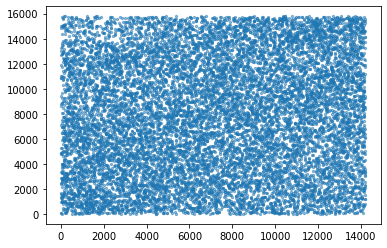

Gaussian 0.09053569013392457


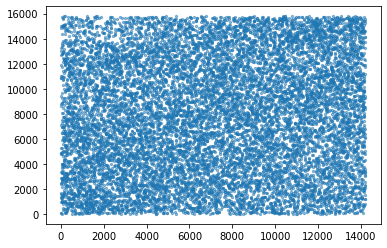

1.0
ZINB 0.09798862243699423


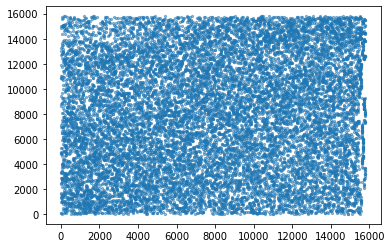

NB 0.09798862243699423


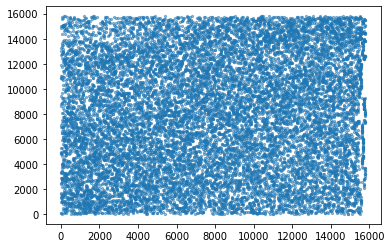

Gaussian 0.09798862243699423


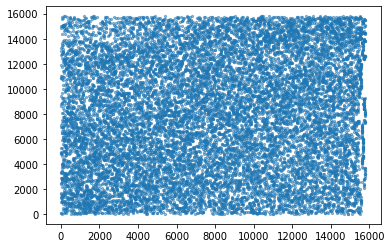

In [9]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10
DESeq_id = list(DESeq_sorted.index.values)
GPcounts_ZINB_id = list(GPcounts_ZINB_sorted.index)
GPcounts_NB_id = list(GPcounts_NB_sorted.index)
GPcounts_G_id = list(GPcounts_G_sorted.index)
corr_ZINB = []
corr_NB = []
corr_G = []

for count in range(10):
    print(percentage[count])
    DESeq_id_part= DESeq_id[int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])]
    GPcounts_ZINB_index_part = []
    GPcounts_NB_index_part = []
    GPcounts_G_index_part = []
    for i in DESeq_id_part:
        GPcounts_ZINB_index_part.append(GPcounts_ZINB_id.index(i))
        GPcounts_NB_index_part.append(GPcounts_NB_id.index(i))
        GPcounts_G_index_part.append(GPcounts_G_id.index(i))
    
    DESeq_index_part = list(range(0,len(DESeq_id_part)))
    
    rho, pval = stats.spearmanr(DESeq_index_part,GPcounts_ZINB_index_part)
    print('ZINB',rho)
    corr_ZINB.append(rho)
    plt.scatter(DESeq_index_part ,GPcounts_ZINB_index_part,s=5,alpha=0.5)
    plt.show() 
    
    rho, pval = stats.spearmanr(DESeq_index_part,GPcounts_NB_index_part)
    print('NB',rho)
    corr_NB.append(rho)
    plt.scatter(DESeq_index_part ,GPcounts_NB_index_part,s=5,alpha=0.5)
    plt.show() 
    
    rho, pval = stats.spearmanr(DESeq_index_part,GPcounts_G_index_part)
    print('Gaussian',rho)
    corr_G.append(rho)
    plt.scatter(DESeq_index_part ,GPcounts_G_index_part,s=5,alpha=0.5)
    plt.show() 
   

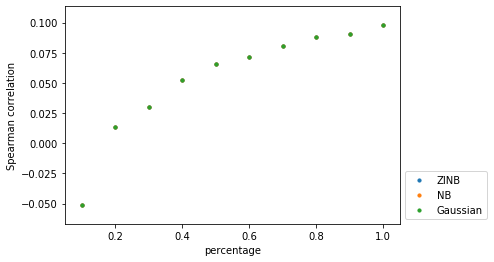

In [10]:
plt.scatter(percentage,corr_ZINB,s=10,label = 'ZINB')
plt.scatter(percentage,corr_NB,s=10,label = 'NB')
plt.scatter(percentage,corr_G,s=10,label = 'Gaussian')
plt.xlabel('percentage')
plt.ylabel('Spearman correlation')
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1)

In [11]:
GPcounts_ZINB_DESeq_sorted = GPcounts_ZINB.reindex(list(DESeq_sorted.index.values))
GPcounts_ZINB_DESeq_sorted 

Dynamic_model_log_likelihood  \
ENSMUSG00000000394                  -4233.164390   
ENSMUSG00000023944                  -2420.363610   
ENSMUSG00000040856                   -705.415440   
ENSMUSG00000021270                  -2124.547360   
ENSMUSG00000027419                  -2817.701907   
...                                          ...   
ENSMUSG00000035851                  -1631.620586   
ENSMUSG00000023030                  -1038.650106   
ENSMUSG00000097804                   -176.654570   
ENSMUSG00000064514                   -179.369697   
ENSMUSG00000035133                  -1732.656799   

                    Constant_model_log_likelihood  log_likelihood_ratio  
ENSMUSG00000000394                   -4451.216023          2.180516e+02  
ENSMUSG00000023944                   -2587.805217          1.674416e+02  
ENSMUSG00000040856                    -855.738337          1.503229e+02  
ENSMUSG00000021270                   -2250.918544          1.263712e+02  
ENSMUSG00000027419                   -2940.135555          1.224336e+02  
...                                           ...                   ...  
ENSMUSG00000035851                   -1672.163497          4.054291e+01  
ENSMUSG00000023030                   -1038.521946         -1.281604e-01  
ENSMUSG00000097804                    -217.223590          4.056902e+01  
ENSMUSG00000064514                    -179.369697          8.919818e-07  
ENSMUSG00000035133                   -1731.139087         -1.517712e+00  

[15794 rows x 3 columns]

In [12]:
GPcounts_NB_DESeq_sorted = GPcounts_NB.reindex(list(DESeq_sorted.index.values))
GPcounts_NB_DESeq_sorted 

Dynamic_model_log_likelihood  \
ENSMUSG00000000394                  -4232.517673   
ENSMUSG00000023944                  -2420.185994   
ENSMUSG00000040856                   -759.272908   
ENSMUSG00000021270                  -2124.560305   
ENSMUSG00000027419                  -2817.094338   
...                                          ...   
ENSMUSG00000035851                  -1640.464730   
ENSMUSG00000023030                  -1073.761861   
ENSMUSG00000097804                   -180.013982   
ENSMUSG00000064514                   -181.709561   
ENSMUSG00000035133                  -1782.972382   

                    Constant_model_log_likelihood  log_likelihood_ratio  
ENSMUSG00000000394                   -4697.949501            465.431828  
ENSMUSG00000023944                   -2714.416650            294.230657  
ENSMUSG00000040856                   -1067.205689            307.932782  
ENSMUSG00000021270                   -2310.847353            186.287049  
ENSMUSG00000027419                   -2996.222688            179.128351  
...                                           ...                   ...  
ENSMUSG00000035851                   -1640.460329             -0.004401  
ENSMUSG00000023030                   -1073.771334              0.009473  
ENSMUSG00000097804                    -180.011698             -0.002284  
ENSMUSG00000064514                    -181.706705             -0.002856  
ENSMUSG00000035133                   -1782.981653              0.009271  

[15794 rows x 3 columns]

In [13]:
GPcounts_G_DESeq_sorted = GPcounts_G.reindex(list(DESeq_sorted.index.values))
GPcounts_G_DESeq_sorted

Dynamic_model_log_likelihood  \
ENSMUSG00000000394                   -134.556252   
ENSMUSG00000023944                   -108.199197   
ENSMUSG00000040856                   -398.984494   
ENSMUSG00000021270                   -279.373423   
ENSMUSG00000027419                    -68.509521   
...                                          ...   
ENSMUSG00000035851                   -550.403900   
ENSMUSG00000023030                   -663.134221   
ENSMUSG00000097804                    -99.236727   
ENSMUSG00000064514                   -206.096264   
ENSMUSG00000035133                   -649.475211   

                    Constant_model_log_likelihood  log_likelihood_ratio  
ENSMUSG00000000394                     477.797699           -612.353951  
ENSMUSG00000023944                     426.248978           -534.448175  
ENSMUSG00000040856                    -367.864410            -31.120084  
ENSMUSG00000021270                     236.568152           -515.941575  
ENSMUSG00000027419                     526.503608           -595.013129  
...                                           ...                   ...  
ENSMUSG00000035851                    -183.010921           -367.392979  
ENSMUSG00000023030                    -369.205074           -293.929147  
ENSMUSG00000097804                      25.114778           -124.351504  
ENSMUSG00000064514                     -28.120268           -177.975996  
ENSMUSG00000035133                    -300.681292           -348.793919  

[15794 rows x 3 columns]

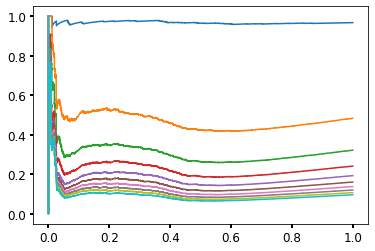

In [14]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10
fig = plt.figure()

dfs = [GPcounts_G_DESeq_sorted['log_likelihood_ratio']]#,GPcounts_NB_DESeq_sorted['log_likelihood_ratio'],GPcounts_G_DESeq_sorted['log_likelihood_ratio']]
for df in range(len(dfs)):
    for i in range(10):
        D =int(len(DESeq_id) * percentage[i])
        true_label = np.zeros(D)

        for j in range(D):
            if DESeq_sorted['padj'][j] <= 0.005 :
                true_label[j] = 1

        labels = pd.DataFrame(true_label, index =DESeq_sorted.index.values[0:D], columns =['label'])

        precision_NB, recall_NB, thresholds_NB = metrics.precision_recall_curve(labels['label'],dfs[df][0:D])
        plt.tick_params(labelsize='large', width=2) 
        plt.plot( recall_NB,precision_NB,label=str(int(percentage[i]*100))+'%')
        #plt.xlabel('recall')
        #plt.ylabel('precision')
        #plt.legend(loc='best', bbox_to_anchor=(1.22, .75))
        '''
        if df == 0:
            title = 'GPcounts with ZINB likelihood'
        elif df == 1:
            title = 'GPcounts with NB likelihood'
        else:
            title = 'GPcounts with Gaussian likelihood'
            
        plt.title(title)
        '''
    plt.show()


[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
index 1578
padj 0.0059007709194659
at 0.1
{0.0: 14214, 1.0: 1580}
index 3157
padj 0.09649835128136698
at 0.2
{0.0: 12636, 1.0: 3158}
index 4737
padj 0.26621162960256
at 0.3
{0.0: 11056, 1.0: 4738}
index 6316
padj 0.4375416592156471
at 0.4
{0.0: 9477, 1.0: 6317}
index 7896
padj 0.583011037937538
at 0.5
{0.0: 7896, 1.0: 7898}
index 9475
padj 0.7057048580157751
at 0.6
{0.0: 6318, 1.0: 9476}
index 11054
padj 0.805344496308915
at 0.7
{0.0: 4739, 1.0: 11055}
index 12634
padj 0.8884130595591619
at 0.8
{0.0: 3153, 1.0: 12641}
index 14213
padj 0.954146273364838
at 0.9
{0.0: 1580, 1.0: 14214}


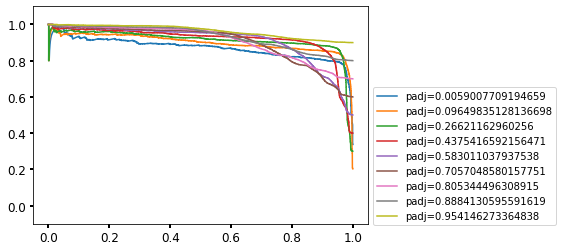

index 1578
padj 0.0059007709194659
at 0.1
{0.0: 14214, 1.0: 1580}
index 3157
padj 0.09649835128136698
at 0.2
{0.0: 12636, 1.0: 3158}
index 4737
padj 0.26621162960256
at 0.3
{0.0: 11056, 1.0: 4738}
index 6316
padj 0.4375416592156471
at 0.4
{0.0: 9477, 1.0: 6317}
index 7896
padj 0.583011037937538
at 0.5
{0.0: 7896, 1.0: 7898}
index 9475
padj 0.7057048580157751
at 0.6
{0.0: 6318, 1.0: 9476}
index 11054
padj 0.805344496308915
at 0.7
{0.0: 4739, 1.0: 11055}
index 12634
padj 0.8884130595591619
at 0.8
{0.0: 3153, 1.0: 12641}
index 14213
padj 0.954146273364838
at 0.9
{0.0: 1580, 1.0: 14214}


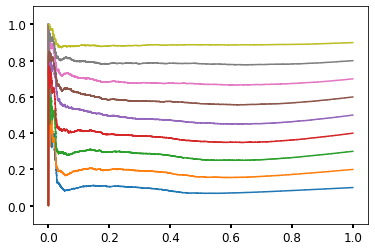

In [15]:
#percentage = np.array(list(range(.1,10)))
percentage = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
#[.0001,.001,.005,.01,.05,.1,.5,1.]
print(percentage)
DESeq_id = list(DESeq_sorted.index.values)
fig = plt.figure()

dfs = [GPcounts_NB_DESeq_sorted['log_likelihood_ratio'],GPcounts_G_DESeq_sorted['log_likelihood_ratio']]
D = len(DESeq_sorted)

for df in range(len(dfs)):
    D = len(DESeq_sorted)
    for i in range(9):
        true_label = np.zeros(D)
        pval_index =int(len(DESeq_sorted['padj']) * percentage[i])-1
        print('index',pval_index)
        print('padj',DESeq_sorted['padj'][pval_index])
        print('at',percentage[i])

        for j in range(D):
            if DESeq_sorted['padj'][j] <= DESeq_sorted['padj'][pval_index]:
                true_label[j] = 1

        labels = pd.DataFrame(true_label, index =DESeq_sorted.index.values, columns =['label'])
        
        unique, counts = np.unique(true_label, return_counts=True)
        
        print(dict(zip(unique, counts)))
        precision, recall, thresholds = metrics.precision_recall_curve(labels['label'],dfs[df])
        #print(precision, recall, thresholds )
        plt.plot( recall,precision,label='padj='+str(DESeq_sorted['padj'][pval_index]))
        plt.tick_params(labelsize='large', width=2) 
        '''
        plt.xlabel('recall')
        plt.ylabel('precision')
        plt.legend(loc='best', bbox_to_anchor=(1.22, .75))
        '''
        if df == 0:
            plt.legend(loc='best', bbox_to_anchor=(1., .65))
        
            #title = 'GPcounts with NB likelihood'
        '''
        else:
            title = 'GPcounts with Gaussian likelihood'
            
        plt.title(title )
        '''
        plt.ylim([-.1,1.1])
        
    plt.show()
